# Interact Exercise 4

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.display import display

:0: FutureWarning: IPython widgets are experimental and may change in the future.


## Line with Gaussian noise

Write a function named `random_line` that creates `x` and `y` data for a line with y direction random noise that has a normal distribution $N(0,\sigma^2)$:

$$
y = m x + b + N(0,\sigma^2)
$$

Be careful about the `sigma=0.0` case.

In [3]:
def random_line(m, b, sigma, size=10):
    """Create a line y = m*x + b + N(0,sigma**2) between x=[-1.0,1.0]
    
    Parameters
    ----------
    m : float
        The slope of the line.
    b : float
        The y-intercept of the line.
    sigma : float
        The standard deviation of the y direction normal distribution noise.
    size : int
        The number of points to create for the line.
    
    Returns
    -------
    x : array of floats
        The array of x values for the line with `size` points.
    y : array of floats
        The array of y values for the lines with `size` points.
    """
    
    x = np.linspace(-1.0,1.0,size)
    def N(mu, sigma):
        if sigma == 0:
            N = 0
        else:
            N = np.exp(-1*((x-mu)**2)/(2*(sigma**2)))/(sigma*((2*np.pi)**0.5))
        return N
    y = m*x + b + N(0,sigma)
    return x, y

In [4]:
random_line(0.0,0.0,1.0,500)

(array([-1.        , -0.99599198, -0.99198397, -0.98797595, -0.98396794,
        -0.97995992, -0.9759519 , -0.97194389, -0.96793587, -0.96392786,
        -0.95991984, -0.95591182, -0.95190381, -0.94789579, -0.94388778,
        -0.93987976, -0.93587174, -0.93186373, -0.92785571, -0.9238477 ,
        -0.91983968, -0.91583166, -0.91182365, -0.90781563, -0.90380762,
        -0.8997996 , -0.89579158, -0.89178357, -0.88777555, -0.88376754,
        -0.87975952, -0.8757515 , -0.87174349, -0.86773547, -0.86372745,
        -0.85971944, -0.85571142, -0.85170341, -0.84769539, -0.84368737,
        -0.83967936, -0.83567134, -0.83166333, -0.82765531, -0.82364729,
        -0.81963928, -0.81563126, -0.81162325, -0.80761523, -0.80360721,
        -0.7995992 , -0.79559118, -0.79158317, -0.78757515, -0.78356713,
        -0.77955912, -0.7755511 , -0.77154309, -0.76753507, -0.76352705,
        -0.75951904, -0.75551102, -0.75150301, -0.74749499, -0.74348697,
        -0.73947896, -0.73547094, -0.73146293, -0.7

In [5]:
m = 0.0; b = 1.0; sigma=0.0; size=3
x, y = random_line(m, b, sigma, size)
assert len(x)==len(y)==size
assert list(x)==[-1.0,0.0,1.0]
assert list(y)==[1.0,1.0,1.0]
sigma = 1.0
m = 0.0; b = 0.0
size = 500
x, y = random_line(m, b, sigma, size)
assert np.allclose(np.mean(y-m*x-b), 0.0, rtol=0.1, atol=0.1)
assert np.allclose(np.std(y-m*x-b), sigma, rtol=0.1, atol=0.1)

AssertionError: 

Write a function named `plot_random_line` that takes the same arguments as `random_line` and creates a random line using `random_line` and then plots the `x` and `y` points using Matplotlib's `scatter` function:

* Make the marker color settable through a `color` keyword argument with a default of `red`.
* Display the range $x=[-1.1,1.1]$ and $y=[-10.0,10.0]$.
* Customize your plot to make it effective and beautiful.

In [6]:
def ticks_out(ax):
    """Move the ticks to the outside of the box."""
    ax.get_xaxis().set_tick_params(direction='out', width=1, which='both')
    ax.get_yaxis().set_tick_params(direction='out', width=1, which='both')

In [7]:
def plot_random_line(m, b, sigma, size=10, color='red'):
    """Plot a random line with slope m, intercept b and size points."""
    x, y = random_line(m, b, sigma, size)
    plt.scatter(x,y,color=color)
    plt.xlim(min(x),max(x))
    plt.ylim(min(y),max(y))
    plt.tick_params(direction='out', width=1, which='both')

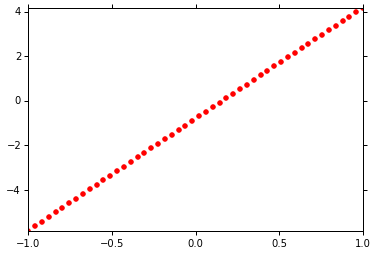

In [8]:
plot_random_line(5.0, -1.0, 2.0, 50)

In [9]:
assert True # use this cell to grade the plot_random_line function

Use `interact` to explore the `plot_random_line` function using:

* `m`: a float valued slider from `-10.0` to `10.0` with steps of `0.1`.
* `b`: a float valued slider from `-5.0` to `5.0` with steps of `0.1`.
* `sigma`: a float valued slider from `0.0` to `5.0` with steps of `0.01`.
* `size`: an int valued slider from `10` to `100` with steps of `10`.
* `color`: a dropdown with options for `red`, `green` and `blue`.

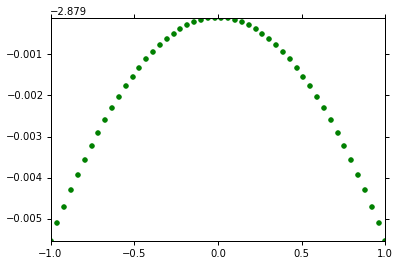

In [10]:
interact(plot_random_line, m=(-10.0,10.0,0.1), b=(-5.0,5.0,0.1), sigma=(0.0,5.0,0.01), size=(10,100,10), color=['red','green','blue'])

In [11]:
#### assert True # use this cell to grade the plot_random_line interact